# 3250 Foundations of Data Science
## Frederick Ferguson
## April 12, 2016

### Assignment 4 - O-Ring Erosion or Blowby

In [74]:
import pandas as pd
import numpy as np

import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.sandbox.regression.predstd import wls_prediction_std

import seaborn as sns


In [75]:
# Read in the dataset
dat = pd.read_csv("o-ring-erosion-or-blowby.data",names=["O-rings", "Distressed", "Temp", "PSI","Order"],sep='\s+')
# Drop the Index Order
dat=dat.drop("Order",1)
dat

,O-rings,Distressed,Temp,PSI
0,6,0,66,50
1,6,1,70,50
2,6,0,69,50
3,6,0,68,50
4,6,0,67,50
5,6,0,72,50
6,6,0,73,100
7,6,0,70,100
8,6,1,57,200
9,6,1,63,200


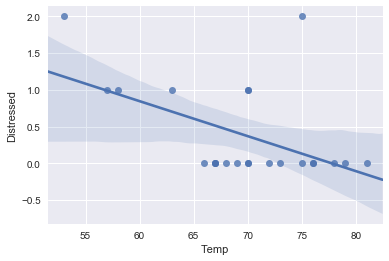

In [76]:
# Plot the Temperate vs. Number of Distressed O-rings
sns.regplot(x="Temp", y="Distressed", data=dat)
plt.show()

In [77]:
# Fit a Multivariate Linear Regression Model
y=dat["Distressed"]
X=dat[["O-rings", "Temp", "PSI"]]
X = sm.add_constant(X)
oring_model = sm.OLS(y, X).fit()
oring_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Distressed   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     5.490
Date:                Thu, 12 Apr 2018   Prob (F-statistic):             0.0126
Time:                        13:38:32   Log-Likelihood:                -17.408
No. Observations:                  23   AIC:                             40.82
Df Residuals:                      20   BIC:                             44.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
O-rings        0.5550      0.198      2.803      0.011       0.142       0.968
Temp          -0.0487      0.017     -2.910      0.009      -0.084      -0.014
PSI            0.0029      0.002      1.699      0.105      -0.001       0.007
==============================================================================
Omnibus:                       19.324   Durbin-Watson:                   2.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.471
Skew:                           1.782   Prob(JB):                     8.00e-06
Kurtosis:                       6.433   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Run predictions for Temperate=31 and PSI = 0, 50, 100 and 200 respectively
pred = pd.read_csv("o-ring-erosion-or-blowby-predict.data.txt",names=["O-rings", "Distressed", "Temp", "PSI","Order"],sep='\s+')
X2=pred[["O-rings", "Temp", "PSI"]]
predictions = oring_model.predict(X2)
predictions


0    1.821027
1    1.967993
2    2.114959
3    2.408892
dtype: float64

In [79]:
#Combine the holdout dataframe with the predictions data series
pred=pred.drop(["Distressed","Order"],1)
pred["Distressed"]=predictions
pred



,O-rings,Temp,PSI,Distressed
0,6,31,0,1.821027
1,6,31,50,1.967993
2,6,31,100,2.114959
3,6,31,200,2.408892


In [80]:
# Combine the training dataframe and the prediction results
combined = dat.append(pred, ignore_index=True)
combined

,Distressed,O-rings,PSI,Temp
0,0.000000,6,50,66
1,1.000000,6,50,70
2,0.000000,6,50,69
3,0.000000,6,50,68
4,0.000000,6,50,67
5,0.000000,6,50,72
6,0.000000,6,100,73
7,0.000000,6,100,70
8,1.000000,6,200,57
9,1.000000,6,200,63


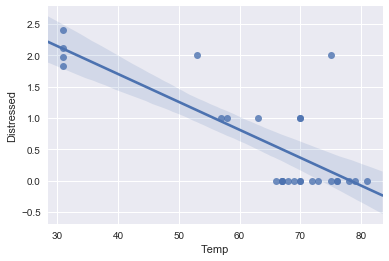

In [81]:
# Plot temperate vs. number of distressed o-rings for all observations including predicted values at 31F
sns.regplot(x="Temp", y="Distressed", data=combined)
plt.show()
